# Comprehensive data exploration with Python

competition: House Prices - Advanced Regression Techniques
 https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

code: Comprehensive data exploration with Python https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

1. <b>Understand the problem</b>. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. <b>Univariable study</b>. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. <b>Multivariate study</b>. We'll try to understand how the dpendent variable and independent variable relate.
4. <b>Basic cleaning</b>. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. <b>Test assumptions</b>. We'll check if our data meets the assumptions required by most multivariate techniques.


In [1]:
# Invited people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'


In [3]:
# Bring in the six packs
df_train = pd.read_csv('~/aiffel/data/house_price_train.csv')

In [5]:
df_train.head()
df_train.describe()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1. So... What can we expect?

The variables that can play important role in this problem.
1. OverallQual
2. YearBuilt
3. TotalBsmtSF
4. GrLivArea



In [17]:
df_train[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']].head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
0,7,2003,856,1710,208500
1,6,1976,1262,1262,181500
2,7,2001,920,1786,223500
3,7,1915,756,1717,140000
4,8,2000,1145,2198,250000


In [18]:
df_train[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']].describe()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1057.429452,1515.463699,180921.195890
std,1.382997,30.202904,438.705324,525.480383,79442.502883
min,1.000000,1872.000000,0.000000,334.000000,34900.000000
25%,5.000000,1954.000000,795.750000,1129.500000,129975.000000
50%,6.000000,1973.000000,991.500000,1464.000000,163000.000000
75%,7.000000,2000.000000,1298.250000,1776.750000,214000.000000
max,10.000000,2010.000000,6110.000000,5642.000000,755000.000000


In [19]:
df_train[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   YearBuilt    1460 non-null   int64
 2   TotalBsmtSF  1460 non-null   int64
 3   GrLivArea    1460 non-null   int64
 4   SalePrice    1460 non-null   int64
dtypes: int64(5)
memory usage: 57.2 KB


# 2. First things first: analysis 'SalesPrice'

In [6]:
# Descriptive statistics summary for 'SalePrice'
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

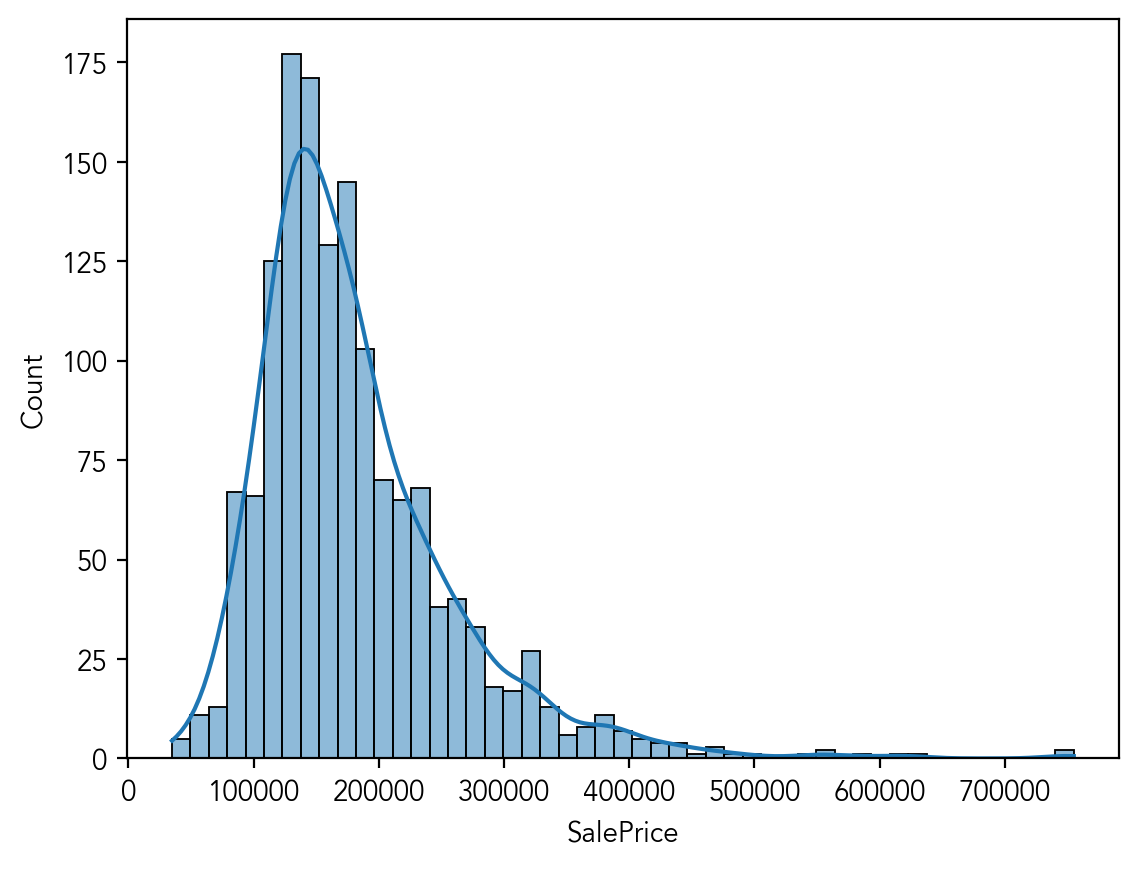

In [9]:
# Histogram for 'SalePrice'
sns.histplot(data = df_train, x = 'SalePrice', kde = True)

- Deviate from the normal distirbution
- Have appreciable positive skewness
- Show peakedness

In [10]:
# Skewness and kurtosis
print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

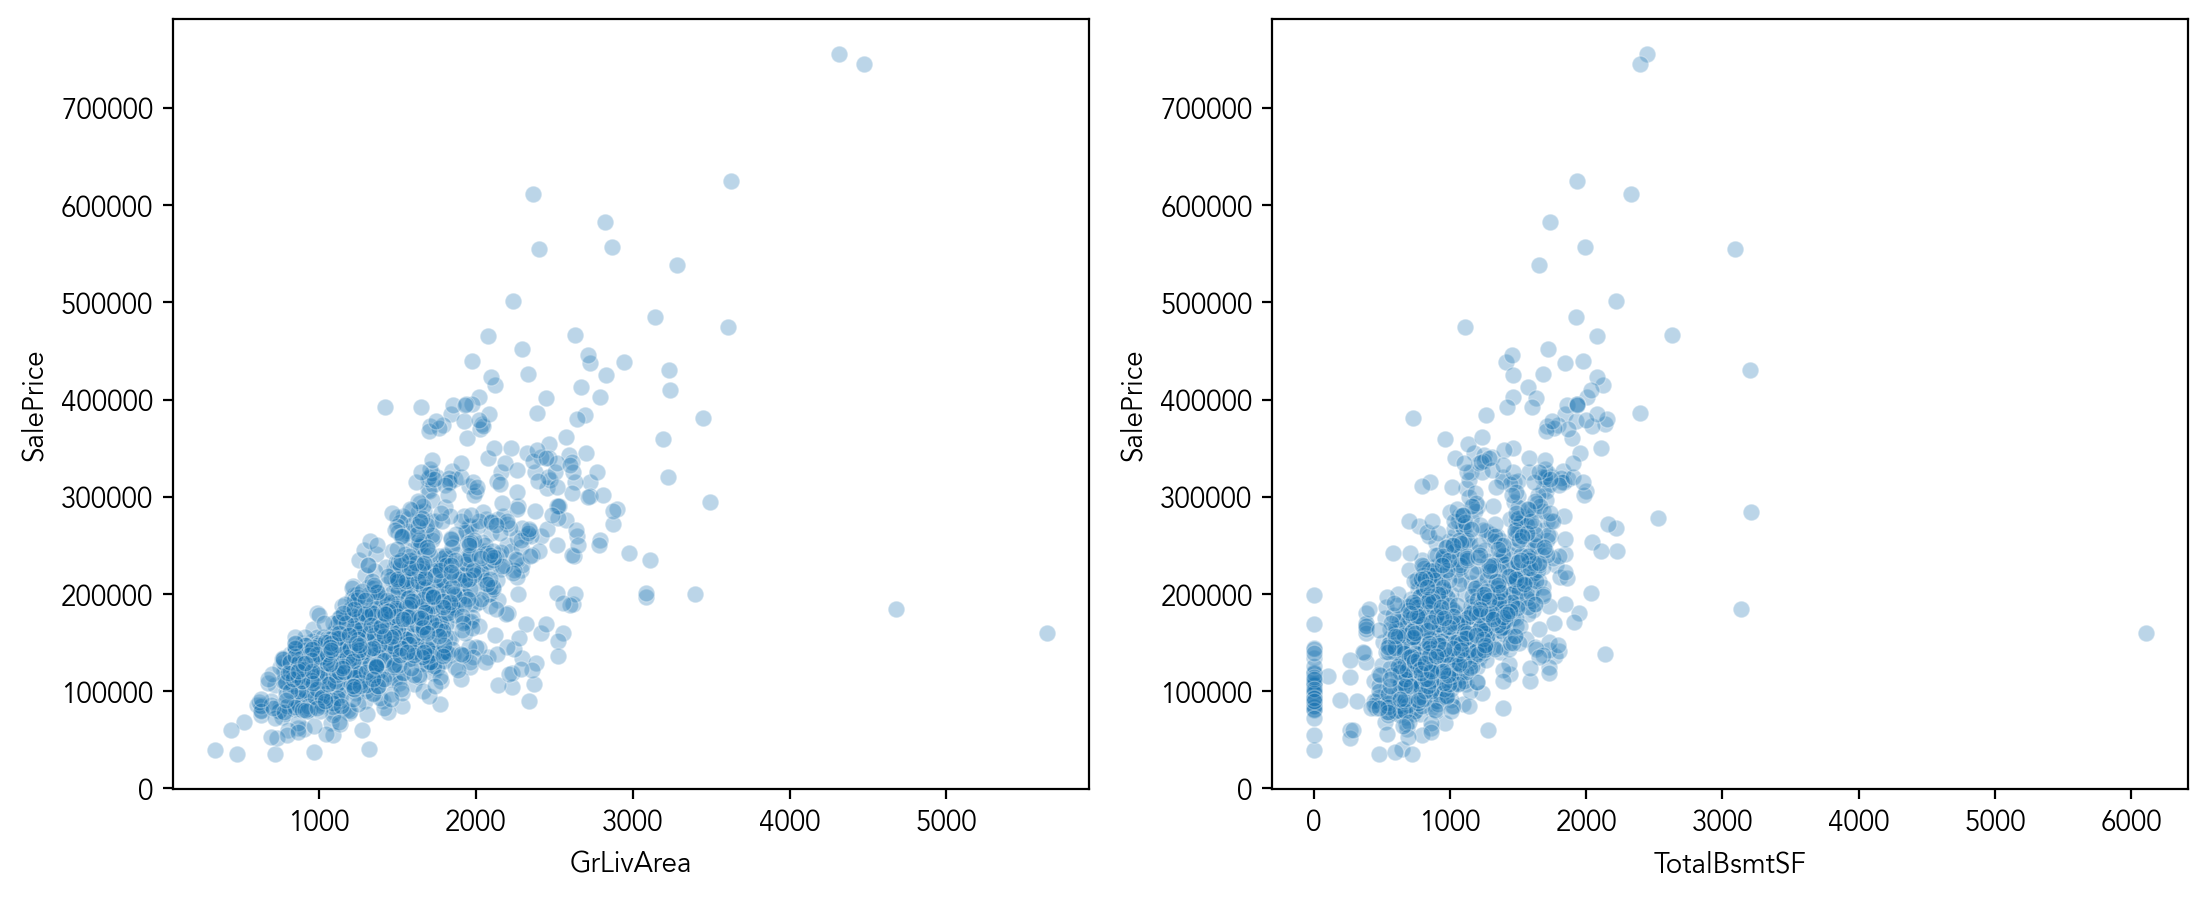

In [14]:
# Relationship between 'SalePrice' vs. 'GrLivArea', 'TotalBsmtSF'
f, ax = plt.subplots(1, 2, figsize = (13, 5))
sns.scatterplot(data = df_train, x = 'GrLivArea', y = 'SalePrice', alpha = 0.3, ax = ax[0])
sns.scatterplot(data = df_train, x = 'TotalBsmtSF', y = 'SalePrice', alpha = 0.3, ax = ax[1])

- 'SalePrice' vs. 'GrLivArea' and 'TotalBsmtSF' have a linear relationship

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

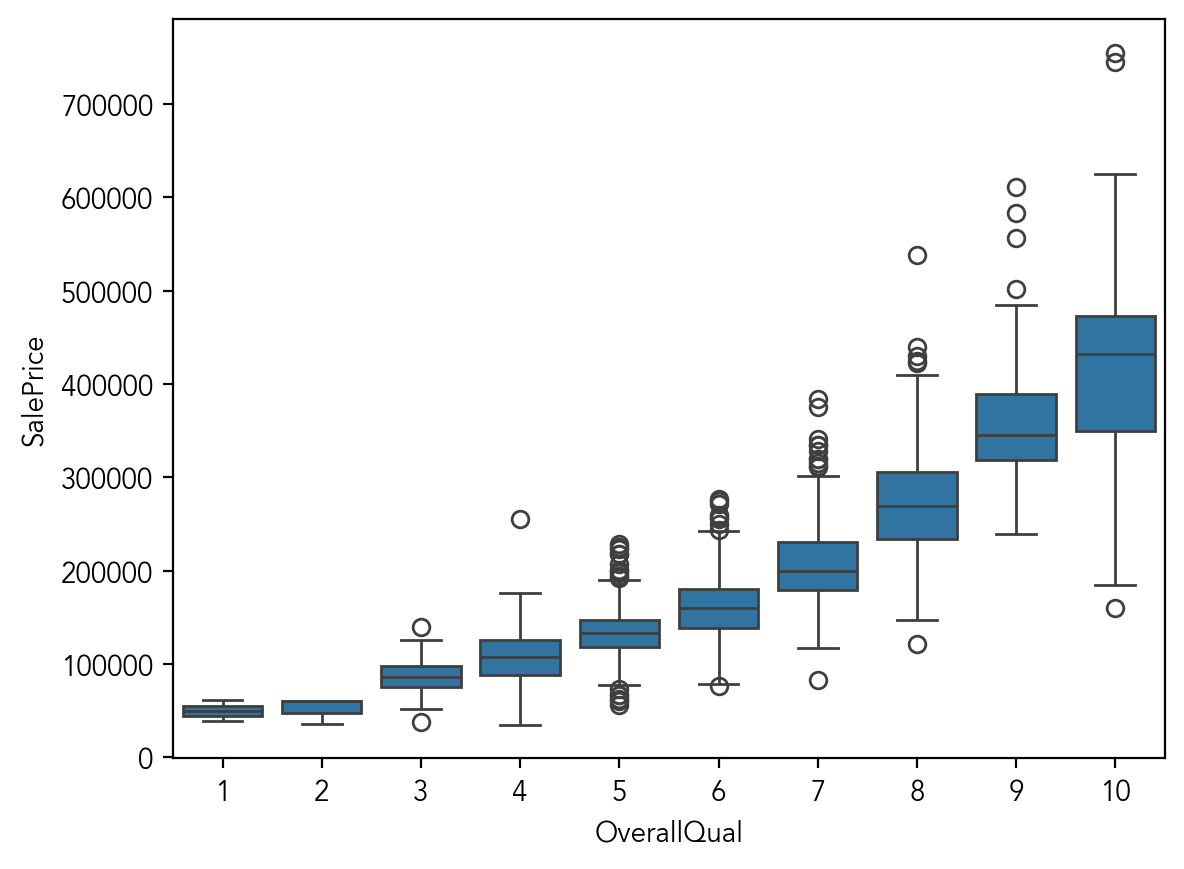

In [15]:
# Box plot for 'overallqual' vs. 'SalePrice'
sns.boxplot(data = df_train, x = 'OverallQual', y = 'SalePrice')

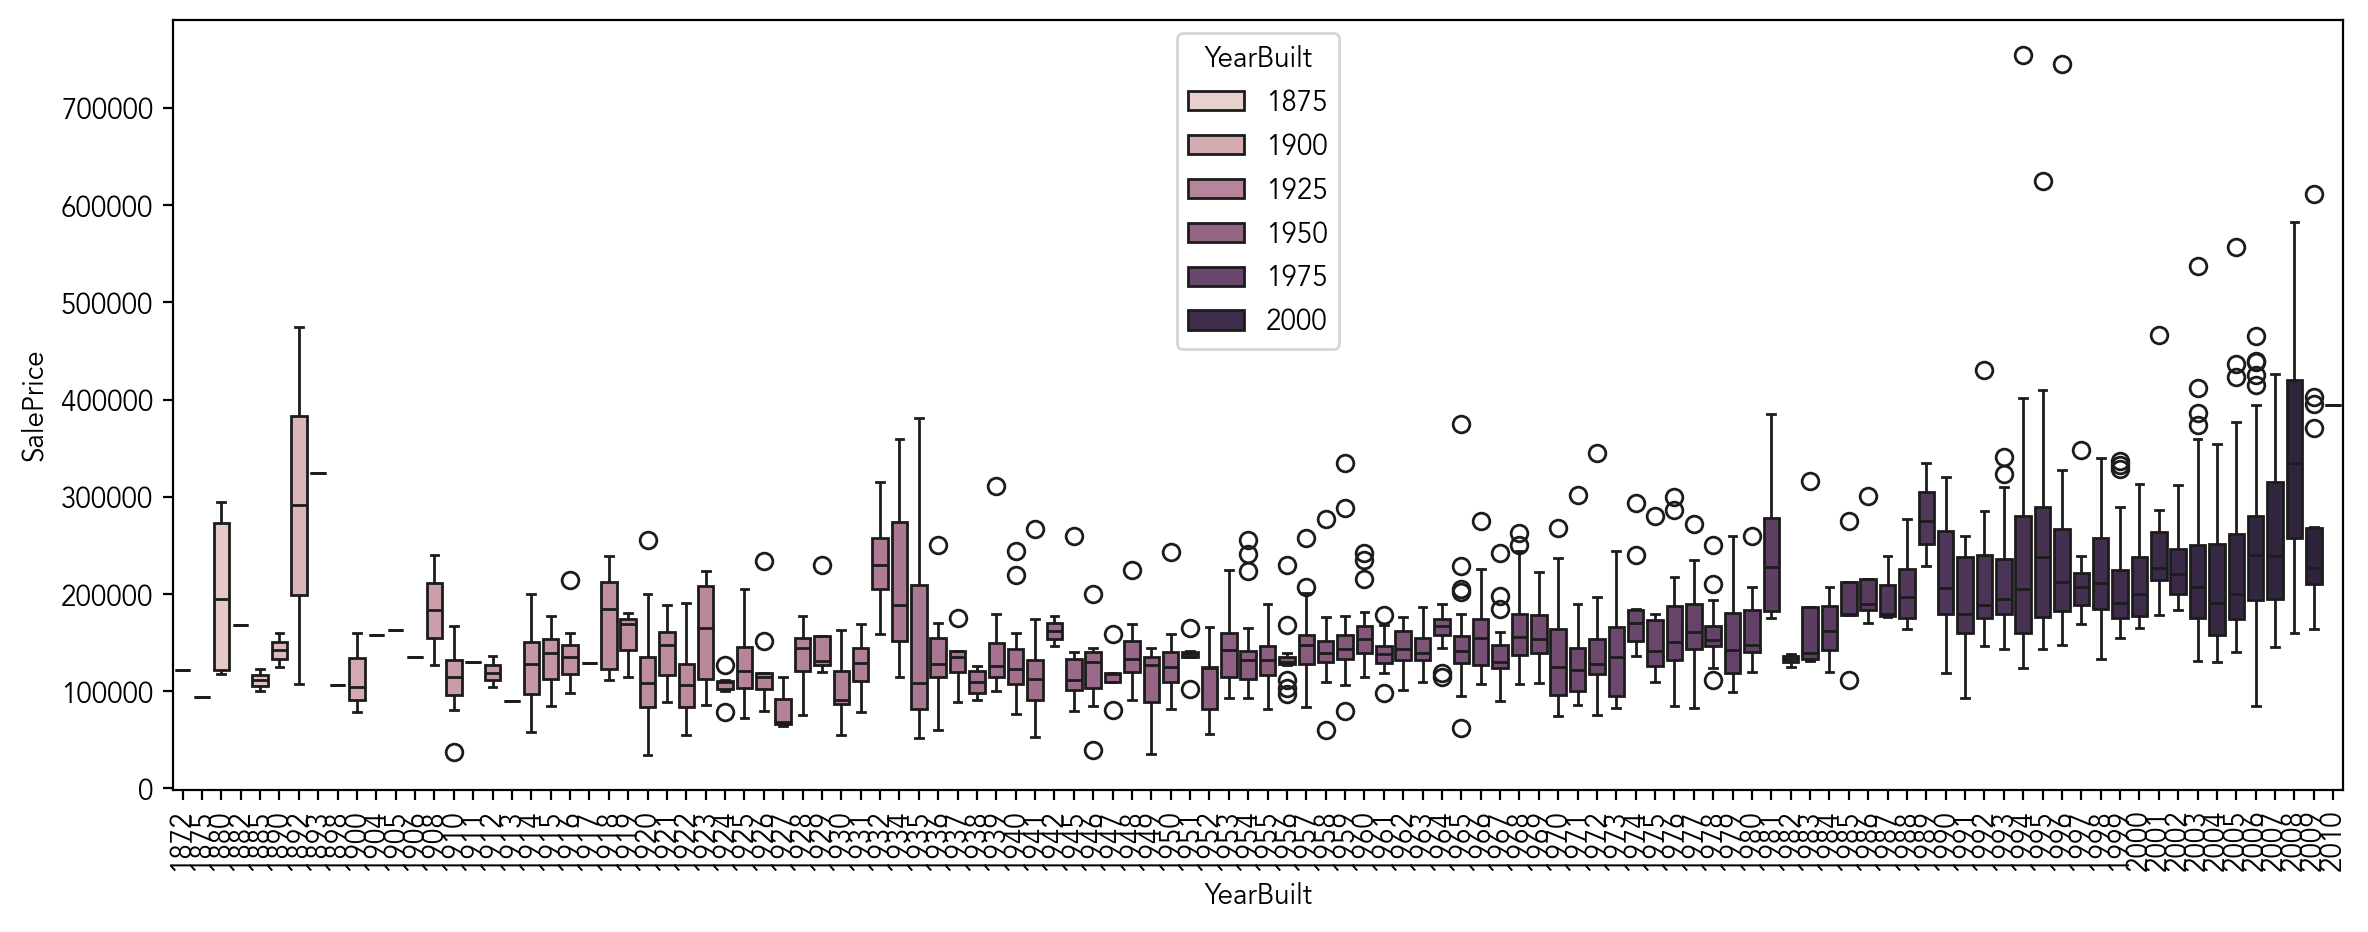

In [30]:
# Box plot for 'YearBuilt' vs. 'SalePrice'
plt.figure(figsize = (14, 5))
sns.boxplot(data = df_train, x = 'YearBuilt', y = 'SalePrice', hue = 'YearBuilt')
plt.xticks(rotation = 90);

# 3. Keep calm and work smart

## Plasza soup
- Correlation matrix (heatmap style)
- 'SalePrice' correlation matrix (zoomed heatmap style)
- Scatter plot between the most correlated variables (more like Jagger style)

<Axes: >

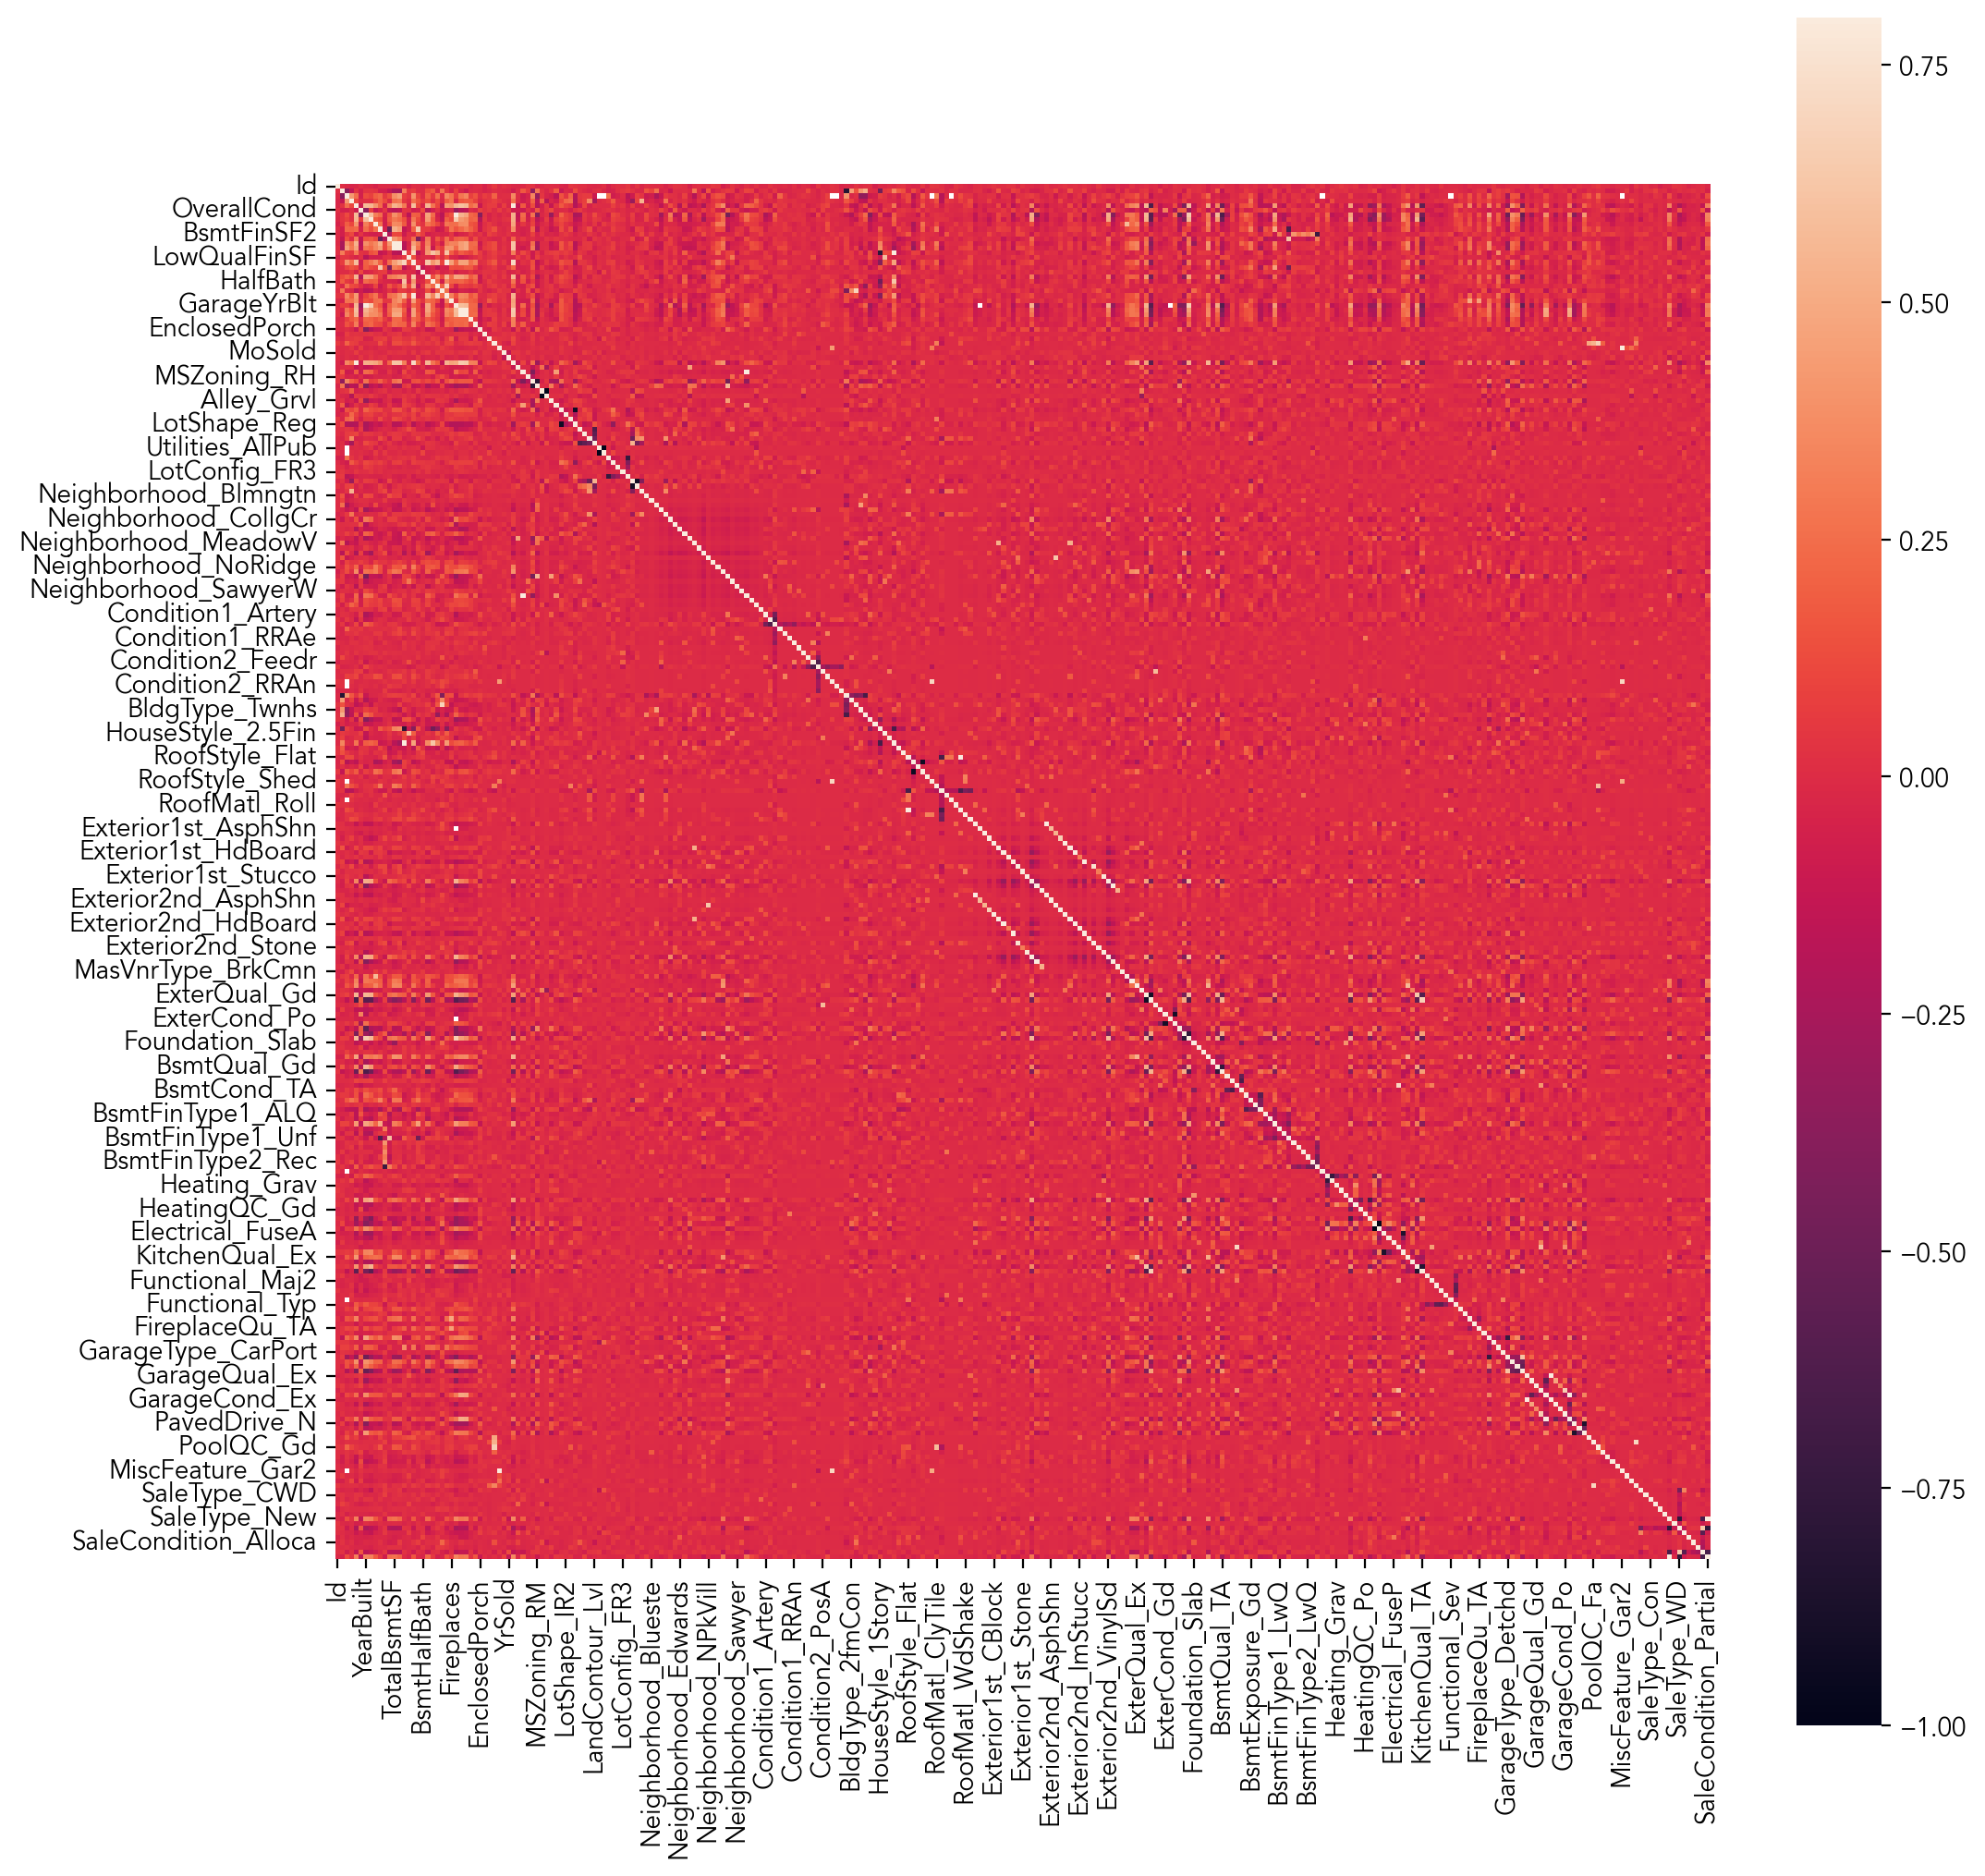

In [35]:
df_train_encoded = pd.get_dummies(df_train)
corrmat = df_train_encoded.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corrmat, vmax=0.8, square=True)
